In [1]:
import time
from time import perf_counter as timer
start = timer()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
print(os.listdir("./lab6"))

['american_sign_language.PNG', 'amer_sign2 (1).png', 'amer_sign2.png', 'amer_sign2.zip', 'amer_sign3.png', 'sign_mnist_test', 'sign_mnist_test.zip', 'sign_mnist_train', 'sign_mnist_train.zip']


In [2]:
train = pd.read_csv('./lab6/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('./lab6/sign_mnist_test/sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
train.shape

(27455, 785)

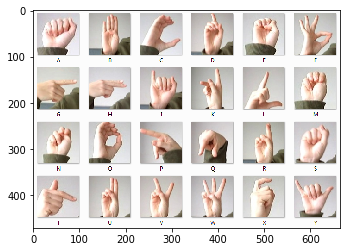

In [5]:
image = load_img("./lab6/amer_sign2.png")
plt.imshow(image)

In [6]:
labels = train['label'].values

In [7]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

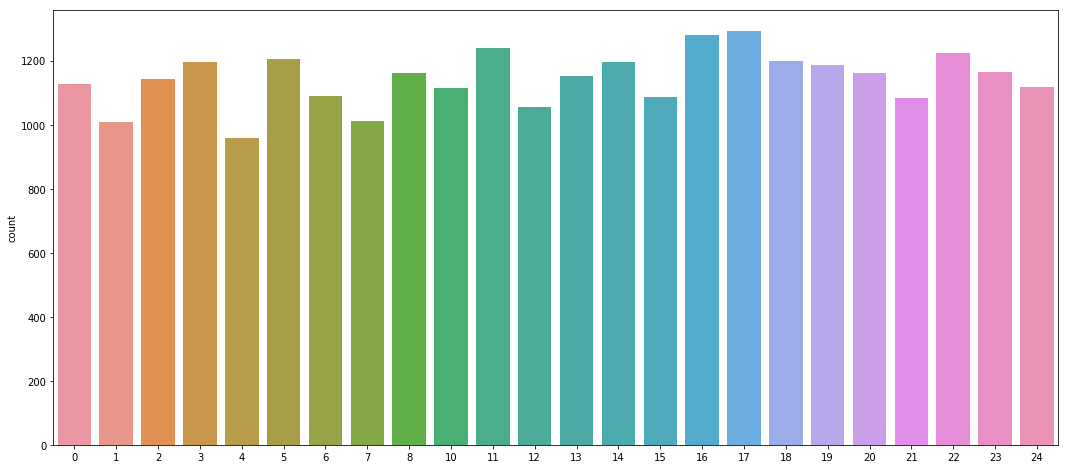

In [8]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)


In [9]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [10]:
train.drop('label', axis = 1, inplace = True)

In [11]:
images = train.values
print(images.dtype, np.round(images.min(), 4), np.round(images.max(), 4), images.shape)

int64 0 255 (27455, 784)


Text(0.5, 0.98, 'Grayscale images')

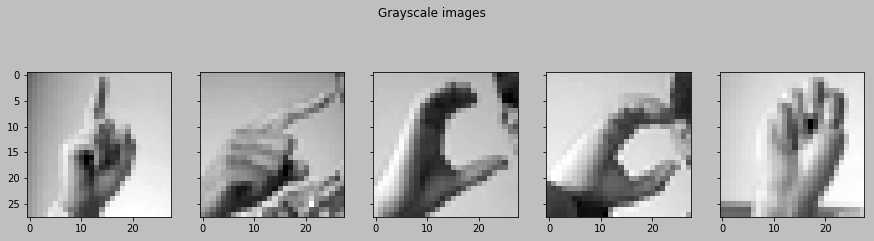

In [12]:
plt.style.use('grayscale')
fig, axs = plt.subplots(1, 5, figsize=(15, 4), sharey=True)
for i in range(5): 
        axs[i].imshow(images[i].reshape(28,28))
fig.suptitle('Grayscale images from Train dataset')

In [13]:
images =  images/255

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, stratify = labels, random_state = 7)

In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [26]:
num_classes = 24
batch_size = 125
epochs = 50

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(64, kernel_size=(4,4), activation = 'relu', input_shape=(28, 28 ,1), padding='same' ))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (4, 4), activation = 'relu', padding='same' ))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer='nadam',
              metrics=['accuracy'])

In [34]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(shear_range = 0.25,
                                   zoom_range = 0.15,
                                   rotation_range = 15,
                                   brightness_range = [0.15, 1.15],
                                   width_shift_range = [-2,-1, 0, +1, +2],
                                   height_shift_range = [ -1, 0, +1],
                                   fill_mode = 'reflect')

test_datagen = ImageDataGenerator()

In [35]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 136s 7ms/sample - loss: 1.9938 - accuracy: 0.3838 - val_loss: 1.5800 - val_accuracy: 0.7368
Epoch 2/50
19218/19218 [==============================] - 131s 7ms/sample - loss: 0.5850 - accuracy: 0.8037 - val_loss: 0.8200 - val_accuracy: 0.8904
Epoch 3/50
19218/19218 [==============================] - 123s 6ms/sample - loss: 0.2642 - accuracy: 0.9081 - val_loss: 0.4471 - val_accuracy: 0.9900
Epoch 4/50
19218/19218 [==============================] - 123s 6ms/sample - loss: 0.1386 - accuracy: 0.9562 - val_loss: 0.2964 - val_accuracy: 0.9993
Epoch 5/50
19218/19218 [==============================] - 122s 6ms/sample - loss: 0.0826 - accuracy: 0.9736 - val_loss: 0.2181 - val_accuracy: 0.9985
Epoch 6/50
19218/19218 [==============================] - 122s 6ms/sample - loss: 0.0620 - accuracy: 0.9803 - val_loss: 0.1638 - val_accuracy: 1.0000
Epoch 7/50
19218/19218 [===========================

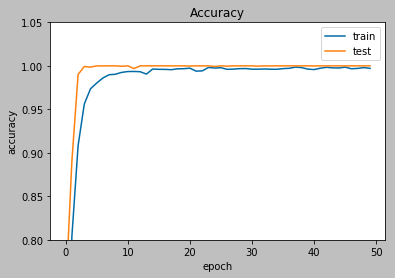

In [38]:
plt.style.use('tableau-colorblind10')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.80, 1.05)
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [39]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values/255
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [40]:
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
y_pred = y_pred.round()
accuracy_score(test_labels, y_pred)

0.9775515895147797

In [41]:
end = timer()
elapsed_time = time.gmtime(end - start)
print("Elapsed time:")
print("{0} minutes {1} seconds.".format(elapsed_time.tm_min, elapsed_time.tm_sec))

Elapsed time:
10 minutes 20 seconds.
